In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Base paths (relative to /notebooks)
PROJECT_ROOT = Path("..").resolve()
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

PARQUET_PATH = DATA_PROCESSED / "combined_features.parquet"
CSV_PATH     = DATA_PROCESSED / "combined_features.csv"

print("Looking for processed files in:", DATA_PROCESSED)

if PARQUET_PATH.exists():
    print(f"Loading Parquet file: {PARQUET_PATH}")
    df = pd.read_parquet(PARQUET_PATH)
elif CSV_PATH.exists():
    print(f"Parquet not found, loading CSV instead: {CSV_PATH}")
    df = pd.read_csv(CSV_PATH)
else:
    raise FileNotFoundError("No combined_features.parquet or combined_features.csv found.")

print("Loaded shape:", df.shape)
df.head()


Looking for processed files in: C:\Users\Kiera\Music_Recommender\data\processed
Parquet not found, loading CSV instead: C:\Users\Kiera\Music_Recommender\data\processed\combined_features.csv
Loaded shape: (4589288, 17)


,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,explicit,time_signature,popularity
0,0000QuApNltQzqS5ROXcQ7,0.629,0.199,4,-15.258,1,0.0610,0.9250,0.000000,0.1100,0.587,66.469,141813.0,2012.0,NaN,4.0,NaN
1,0000j9zugybaOxAeENtFRU,0.680,0.378,5,-7.379,1,0.0685,0.8850,0.000013,0.1200,0.963,116.877,112107.0,NaN,NaN,4.0,NaN
2,0000korRHja9p9XaR5UA5m,0.708,0.714,6,-7.579,1,0.0362,0.3970,0.000047,0.3540,0.756,120.538,235666.0,1995.0,NaN,4.0,NaN
3,0000uJA4xCdxThagdLkkLR,0.458,0.591,5,-5.621,1,0.0326,0.5680,0.000015,0.2860,0.654,184.913,161187.0,NaN,NaN,3.0,NaN
4,00018DRtkxXS7SmAG4ciN6,0.456,0.324,8,-11.521,1,0.0342,0.0242,0.596000,0.0868,0.522,184.970,238827.0,NaN,NaN,3.0,NaN


In [2]:
print("DataFrame info:")
df.info()

print("\nColumn names:")
print(df.columns.tolist())

# --- track_id checks ---
if "track_id" not in df.columns:
    raise ValueError("Expected 'track_id' column is missing from combined dataset!")

n_rows = len(df)
n_non_null_ids = df["track_id"].notna().sum()
n_unique_ids = df["track_id"].nunique()

print("\n=== track_id sanity checks ===")
print(f"Total rows:              {n_rows:,}")
print(f"Non-null track_id:       {n_non_null_ids:,}")
print(f"Unique track_id:         {n_unique_ids:,}")
print(f"Rows with null track_id: {n_rows - n_non_null_ids:,}")
print(f"Duplicate track_id count:{n_rows - n_unique_ids:,}")


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589288 entries, 0 to 4589287
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   track_id          object 
 1   danceability      float64
 2   energy            float64
 3   key               int64  
 4   loudness          float64
 5   mode              int64  
 6   speechiness       float64
 7   acousticness      float64
 8   instrumentalness  float64
 9   liveness          float64
 10  valence           float64
 11  tempo             float64
 12  duration_ms       float64
 13  year              float64
 14  explicit          object 
 15  time_signature    float64
 16  popularity        float64
dtypes: float64(13), int64(2), object(2)
memory usage: 595.2+ MB

Column names:
['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'explicit', 'time_signature', 

In [3]:
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

print("=== Missing values per column ===")
display(missing_summary)


=== Missing values per column ===


,missing_count,missing_pct
explicit,2789940,60.79
popularity,2732560,59.54
year,2134563,46.51
time_signature,21920,0.48
duration_ms,6016,0.13
track_id,0,0.00
danceability,0,0.00
key,0,0.00
energy,0,0.00
instrumentalness,0,0.00


In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns ({len(numeric_cols)}):", numeric_cols)

print("\n=== Descriptive stats for numeric columns ===")
display(df[numeric_cols].describe().T)


Numeric columns (15): ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'time_signature', 'popularity']

=== Descriptive stats for numeric columns ===


,count,mean,std,min,25%,50%,75%,max
danceability,4589288.0,0.537306,0.186951,0.0,0.4100,0.5520,0.6780,1.000
energy,4589288.0,0.565788,0.277510,0.0,0.3480,0.5960,0.8040,1.000
key,4589288.0,5.241130,3.551148,0.0,2.0000,5.0000,8.0000,11.000
loudness,4589288.0,-10.323747,6.172104,-60.0,-12.8230,-8.6500,-6.0470,7.234
mode,4589288.0,0.651275,0.476567,0.0,0.0000,1.0000,1.0000,1.000
speechiness,4589288.0,0.094474,0.135011,0.0,0.0357,0.0472,0.0836,0.971
acousticness,4589288.0,0.386830,0.367187,0.0,0.0252,0.2670,0.7590,0.996
instrumentalness,4589288.0,0.239520,0.360206,0.0,0.0000,0.0011,0.5450,1.000
liveness,4589288.0,0.209147,0.187118,0.0,0.0970,0.1290,0.2640,1.000
valence,4589288.0,0.465160,0.270871,0.0,0.2340,0.4530,0.6860,1.000


In [5]:
# Core audio feature columns
audio_cols_01 = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

checks = []

# 0–1 bounded features
for col in audio_cols_01:
    if col in df.columns:
        s = df[col].dropna()
        n = len(s)
        n_lt0 = (s < 0).sum()
        n_gt1 = (s > 1).sum()
        checks.append({
            "feature": col,
            "check": "0 <= x <= 1",
            "n_values": n,
            "n_lt0": int(n_lt0),
            "n_gt1": int(n_gt1),
            "pct_in_range": ((n - n_lt0 - n_gt1) / n * 100) if n > 0 else np.nan,
        })

# key: 0–11
if "key" in df.columns:
    s = df["key"].dropna()
    n = len(s)
    n_outside = ((s < 0) | (s > 11)).sum()
    checks.append({
        "feature": "key",
        "check": "0 <= key <= 11",
        "n_values": n,
        "n_out_of_range": int(n_outside),
        "pct_in_range": ((n - n_outside) / n * 100) if n > 0 else np.nan,
    })

# mode: usually {0,1}
if "mode" in df.columns:
    s = df["mode"].dropna()
    n = len(s)
    valid = s.isin([0, 1]).sum()
    invalid = n - valid
    checks.append({
        "feature": "mode",
        "check": "mode in {0,1}",
        "n_values": n,
        "n_invalid": int(invalid),
        "pct_valid": (valid / n * 100) if n > 0 else np.nan,
    })

# tempo: positive, typically < 300 bpm
if "tempo" in df.columns:
    s = df["tempo"].dropna()
    n = len(s)
    n_le0 = (s <= 0).sum()
    n_gt300 = (s > 300).sum()
    checks.append({
        "feature": "tempo",
        "check": "0 < tempo <= 300",
        "n_values": n,
        "n_le0": int(n_le0),
        "n_gt300": int(n_gt300),
        "pct_in_range": ((n - n_le0 - n_gt300) / n * 100) if n > 0 else np.nan,
    })

# loudness: typically [-60, +5] dB
if "loudness" in df.columns:
    s = df["loudness"].dropna()
    n = len(s)
    n_lt_minus60 = (s < -60).sum()
    n_gt5 = (s > 5).sum()
    checks.append({
        "feature": "loudness",
        "check": "-60 <= loudness <= 5",
        "n_values": n,
        "n_lt_-60": int(n_lt_minus60),
        "n_gt5": int(n_gt5),
        "pct_in_range": ((n - n_lt_minus60 - n_gt5) / n * 100) if n > 0 else np.nan,
    })

# time_signature: usually integer 1–8 or so
if "time_signature" in df.columns:
    s = df["time_signature"].dropna()
    n = len(s)
    n_non_int = (~(s == s.astype(int))).sum()
    n_outside = ((s < 1) | (s > 8)).sum()
    checks.append({
        "feature": "time_signature",
        "check": "integer & 1 <= x <= 8",
        "n_values": n,
        "n_non_int": int(n_non_int),
        "n_out_of_range": int(n_outside),
        "pct_in_range": ((n - n_non_int - n_outside) / n * 100) if n > 0 else np.nan,
    })

range_checks_df = pd.DataFrame(checks)
print("=== Range / validity checks for audio features ===")
display(range_checks_df)


=== Range / validity checks for audio features ===


,feature,check,n_values,n_lt0,n_gt1,pct_in_range,n_out_of_range,n_invalid,pct_valid,n_le0,n_gt300,n_lt_-60,n_gt5,n_non_int
0,danceability,0 <= x <= 1,4589288,0.0,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,energy,0 <= x <= 1,4589288,0.0,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,speechiness,0 <= x <= 1,4589288,0.0,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,acousticness,0 <= x <= 1,4589288,0.0,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,instrumentalness,0 <= x <= 1,4589288,0.0,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,liveness,0 <= x <= 1,4589288,0.0,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,valence,0 <= x <= 1,4589288,0.0,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,key,0 <= key <= 11,4589288,NaN,NaN,100.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,mode,"mode in {0,1}",4589288,NaN,NaN,NaN,NaN,0.0,100.0,NaN,NaN,NaN,NaN,NaN
9,tempo,0 < tempo <= 300,4589288,NaN,NaN,99.847057,NaN,NaN,NaN,7019.0,0.0,NaN,NaN,NaN


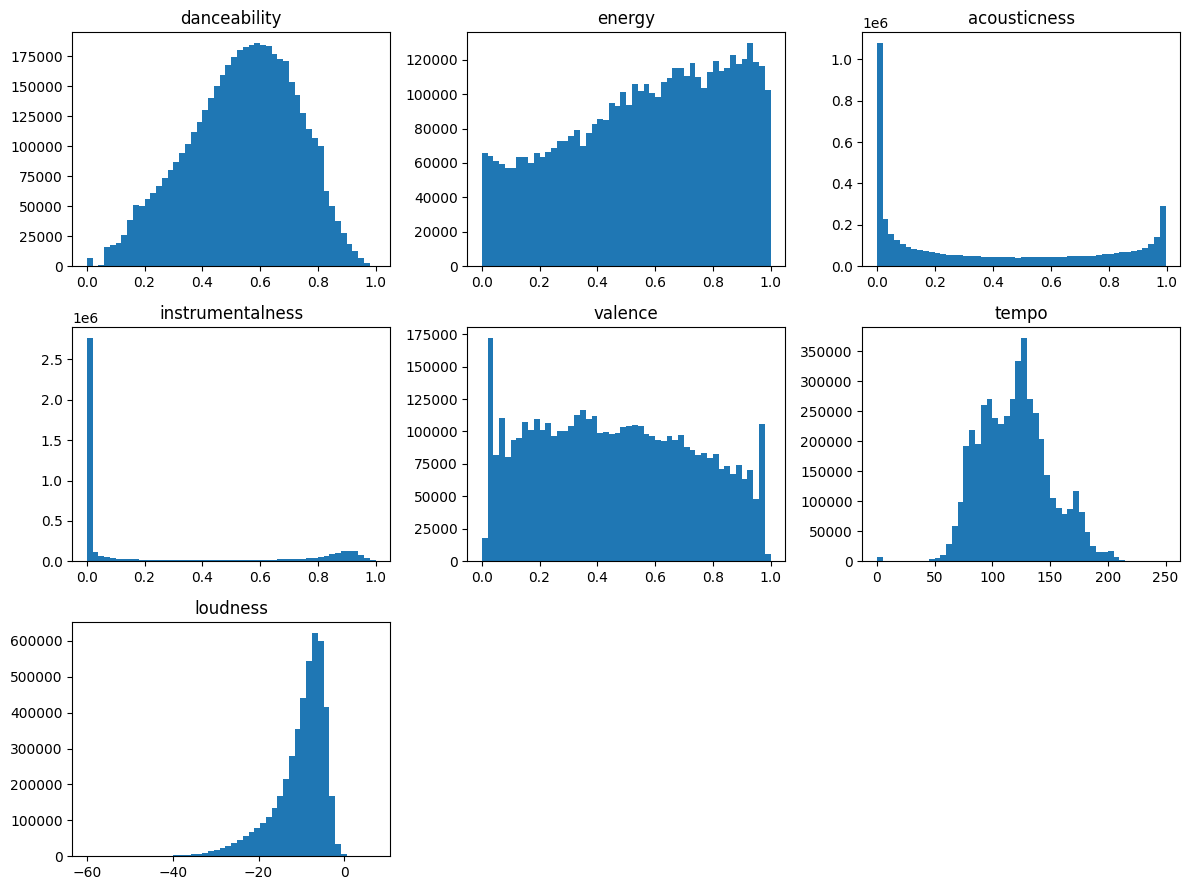

In [6]:
# Pick a subset of core features to visualise
plot_cols = [
    "danceability",
    "energy",
    "acousticness",
    "instrumentalness",
    "valence",
    "tempo",
    "loudness",
]

existing_plot_cols = [c for c in plot_cols if c in df.columns]

n_cols = 3
n_plots = len(existing_plot_cols)
n_rows = int(np.ceil(n_plots / n_cols))

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(existing_plot_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    series = df[col].dropna()
    plt.hist(series, bins=50)
    plt.title(col)
    plt.tight_layout()

plt.show()


In [7]:
import numpy as np
import pandas as pd

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

desc = df[numeric_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

missing_counts = df[numeric_cols].isna().sum()
missing_pct = (missing_counts / len(df) * 100)

desc["missing_count"] = missing_counts
desc["missing_pct"] = missing_pct

print("=== Numeric feature summary with missingness ===")
display(desc)


=== Numeric feature summary with missingness ===


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,missing_count,missing_pct
danceability,4589288.0,0.537306,0.186951,0.0,0.104000,0.200000,0.4100,0.5520,0.6780,0.818,0.89600,1.000,0,0.000000
energy,4589288.0,0.565788,0.277510,0.0,0.013500,0.072900,0.3480,0.5960,0.8040,0.958,0.99000,1.000,0,0.000000
key,4589288.0,5.241130,3.551148,0.0,0.000000,0.000000,2.0000,5.0000,8.0000,11.000,11.00000,11.000,0,0.000000
loudness,4589288.0,-10.323747,6.172104,-60.0,-31.062000,-23.070000,-12.8230,-8.6500,-6.0470,-3.612,-2.23000,7.234,0,0.000000
mode,4589288.0,0.651275,0.476567,0.0,0.000000,0.000000,0.0000,1.0000,1.0000,1.000,1.00000,1.000,0,0.000000
speechiness,4589288.0,0.094474,0.135011,0.0,0.025500,0.028200,0.0357,0.0472,0.0836,0.333,0.91000,0.971,0,0.000000
acousticness,4589288.0,0.386830,0.367187,0.0,0.000009,0.000168,0.0252,0.2670,0.7590,0.983,0.99400,0.996,0,0.000000
instrumentalness,4589288.0,0.239520,0.360206,0.0,0.000000,0.000000,0.0000,0.0011,0.5450,0.922,0.96100,1.000,0,0.000000
liveness,4589288.0,0.209147,0.187118,0.0,0.039200,0.060800,0.0970,0.1290,0.2640,0.668,0.94300,1.000,0,0.000000
valence,4589288.0,0.465160,0.270871,0.0,0.032800,0.050200,0.2340,0.4530,0.6860,0.919,0.96600,1.000,0,0.000000


=== Correlation matrix for core features ===


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
danceability,1.000000,0.239969,0.331798,0.175877,-0.270108,-0.224662,-0.093368,0.532595,0.023260,-0.087786,0.131493
energy,0.239969,1.000000,0.791363,0.074469,-0.752624,-0.216139,0.193784,0.335366,0.253408,0.003843,0.067427
loudness,0.331798,0.791363,1.000000,0.003130,-0.619485,-0.390878,0.098839,0.336014,0.226665,-0.033427,0.145616
speechiness,0.175877,0.074469,0.003130,1.000000,-0.020324,-0.157629,0.204582,0.075773,-0.020741,-0.074190,-0.028545
acousticness,-0.270108,-0.752624,-0.619485,-0.020324,1.000000,0.174259,-0.064464,-0.189569,-0.223230,-0.040143,-0.122592
instrumentalness,-0.224662,-0.216139,-0.390878,-0.157629,0.174259,1.000000,-0.108387,-0.287515,-0.049244,0.119075,-0.202918
liveness,-0.093368,0.193784,0.098839,0.204582,-0.064464,-0.108387,1.000000,0.021946,0.007520,0.006880,-0.055750
valence,0.532595,0.335366,0.336014,0.075773,-0.189569,-0.287515,0.021946,1.000000,0.127857,-0.156253,0.026100
tempo,0.023260,0.253408,0.226665,-0.020741,-0.223230,-0.049244,0.007520,0.127857,1.000000,-0.003116,0.017609
duration_ms,-0.087786,0.003843,-0.033427,-0.074190,-0.040143,0.119075,0.006880,-0.156253,-0.003116,1.000000,-0.077687


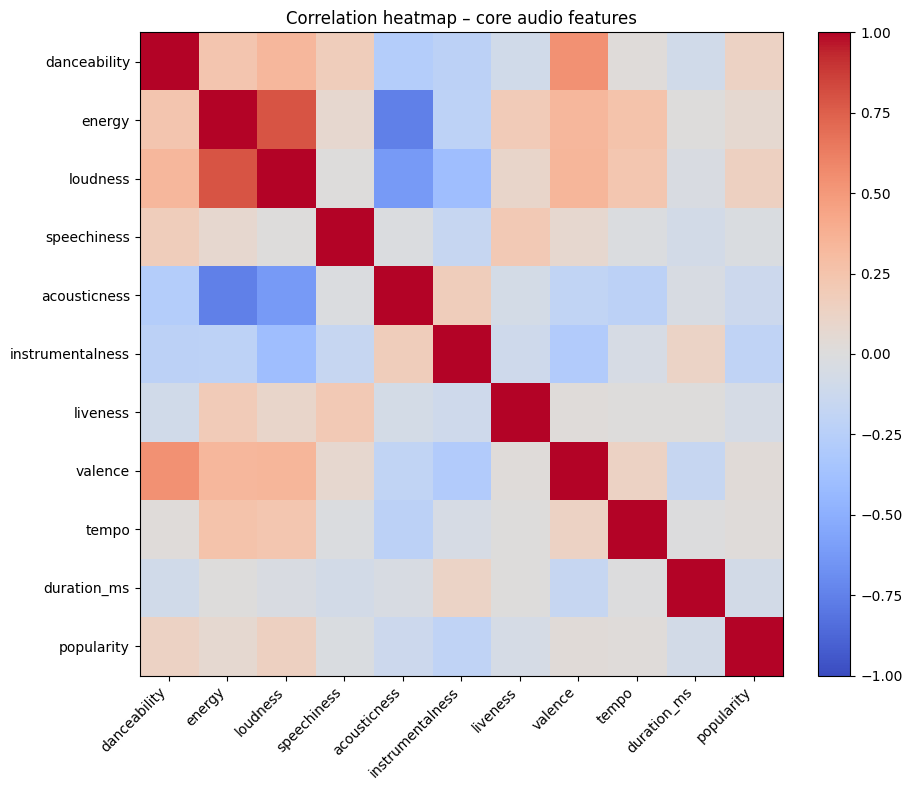

In [8]:
import matplotlib.pyplot as plt

# Restrict to core audio features plus a couple of extras
core_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence",
    "tempo", "duration_ms", "popularity"
]

existing_core = [c for c in core_features if c in df.columns]
corr = df[existing_core].corr()

print("=== Correlation matrix for core features ===")
display(corr)

# Heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(existing_core)), existing_core, rotation=45, ha="right")
plt.yticks(range(len(existing_core)), existing_core)
plt.title("Correlation heatmap – core audio features")
plt.tight_layout()
plt.show()


In [9]:
discrete_cols = [c for c in ["key", "mode", "time_signature", "year"] if c in df.columns]

for col in discrete_cols:
    print(f"\n=== Value counts for {col} ===")
    vc = df[col].value_counts(dropna=False).sort_index()
    display(vc.head(20))  # show first few; year will be long



=== Value counts for key ===


key
0     551515
1     405975
2     506384
3     152596
4     359260
5     386033
6     269658
7     565121
8     270881
9     483692
10    304654
11    333519
Name: count, dtype: int64


=== Value counts for mode ===


mode
0    1600400
1    2988888
Name: count, dtype: int64


=== Value counts for time_signature ===


time_signature
0.0       7113
1.0      57842
3.0     506879
4.0    3894783
5.0     100751
NaN      21920
Name: count, dtype: int64


=== Value counts for year ===


year
0.0         10
1900.0      22
1908.0      19
1909.0      25
1917.0      52
1919.0       2
1920.0      25
1921.0     150
1922.0      71
1923.0     186
1924.0     236
1925.0     278
1926.0    1386
1927.0     615
1928.0    1264
1929.0     954
1930.0    1927
1931.0     985
1932.0     517
1933.0     691
Name: count, dtype: int64

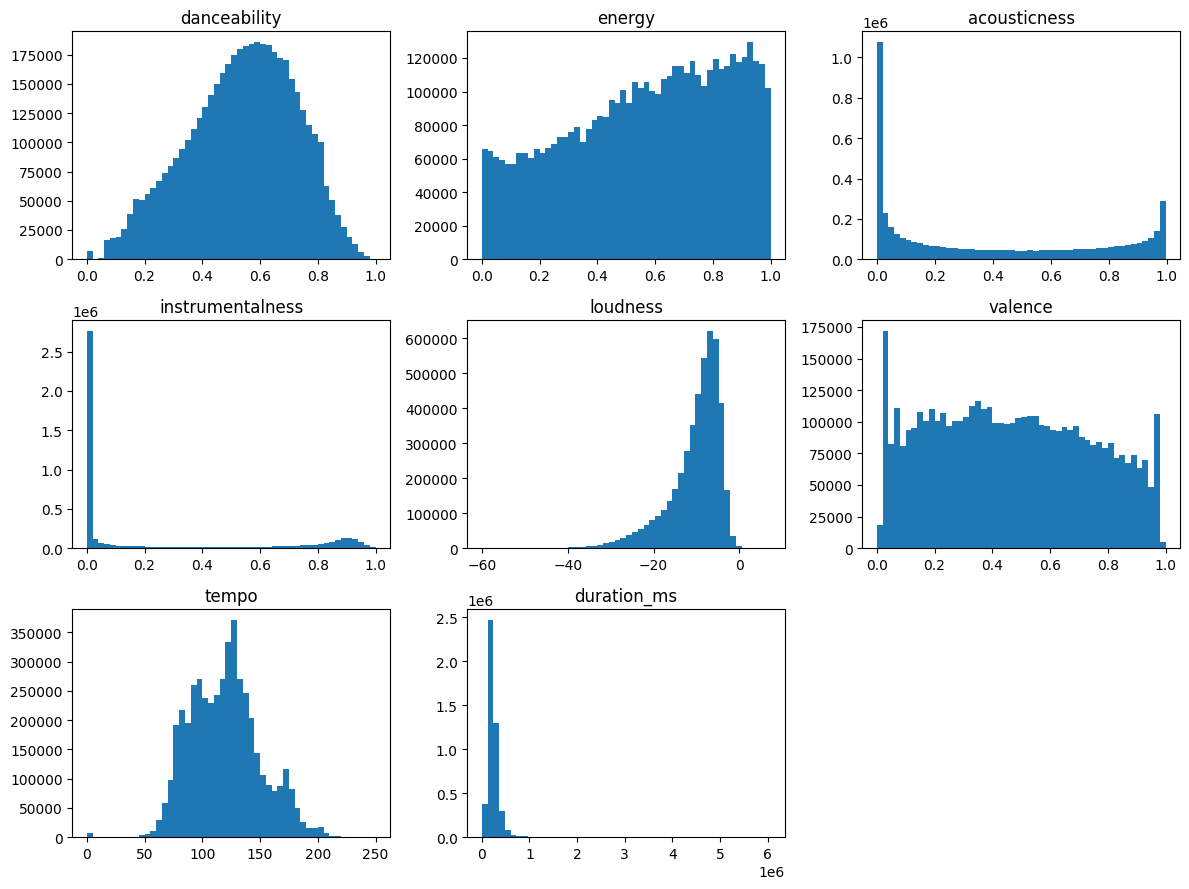

In [10]:
plot_cols = [
    "danceability", "energy", "acousticness", "instrumentalness",
    "loudness", "valence", "tempo", "duration_ms"
]

existing_plot_cols = [c for c in plot_cols if c in df.columns]

n_cols = 3
n_plots = len(existing_plot_cols)
n_rows = int(np.ceil(n_plots / n_cols))

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(existing_plot_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    series = df[col].dropna()
    plt.hist(series, bins=50)
    plt.title(col)
    plt.tight_layout()

plt.show()


In [11]:
checks = []

def outlier_summary(col, lower=None, upper=None):
    s = df[col].dropna()
    n = len(s)
    row = {"feature": col, "n_values": n}

    if lower is not None:
        row["n_below"] = int((s < lower).sum())
        row["pct_below"] = (row["n_below"] / n * 100) if n > 0 else np.nan
    if upper is not None:
        row["n_above"] = int((s > upper).sum())
        row["pct_above"] = (row["n_above"] / n * 100) if n > 0 else np.nan

    row["min"] = s.min()
    row["max"] = s.max()
    return row

# Typical sanity bounds
if "tempo" in df.columns:
    checks.append(outlier_summary("tempo", lower=0, upper=300))

if "loudness" in df.columns:
    checks.append(outlier_summary("loudness", lower=-60, upper=5))

if "duration_ms" in df.columns:
    # songs shorter than 5s or longer than 15min are suspicious
    checks.append(outlier_summary("duration_ms", lower=5_000, upper=900_000))

outlier_df = pd.DataFrame(checks)
print("=== Outlier checks for key continuous features ===")
display(outlier_df)


=== Outlier checks for key continuous features ===


,feature,n_values,n_below,pct_below,n_above,pct_above,min,max
0,tempo,4589288,0,0.000000,0,0.000000,0.0,249.993
1,loudness,4589288,0,0.000000,53,0.001155,-60.0,7.234
2,duration_ms,4583272,508,0.011084,21559,0.470384,1000.0,6061090.000


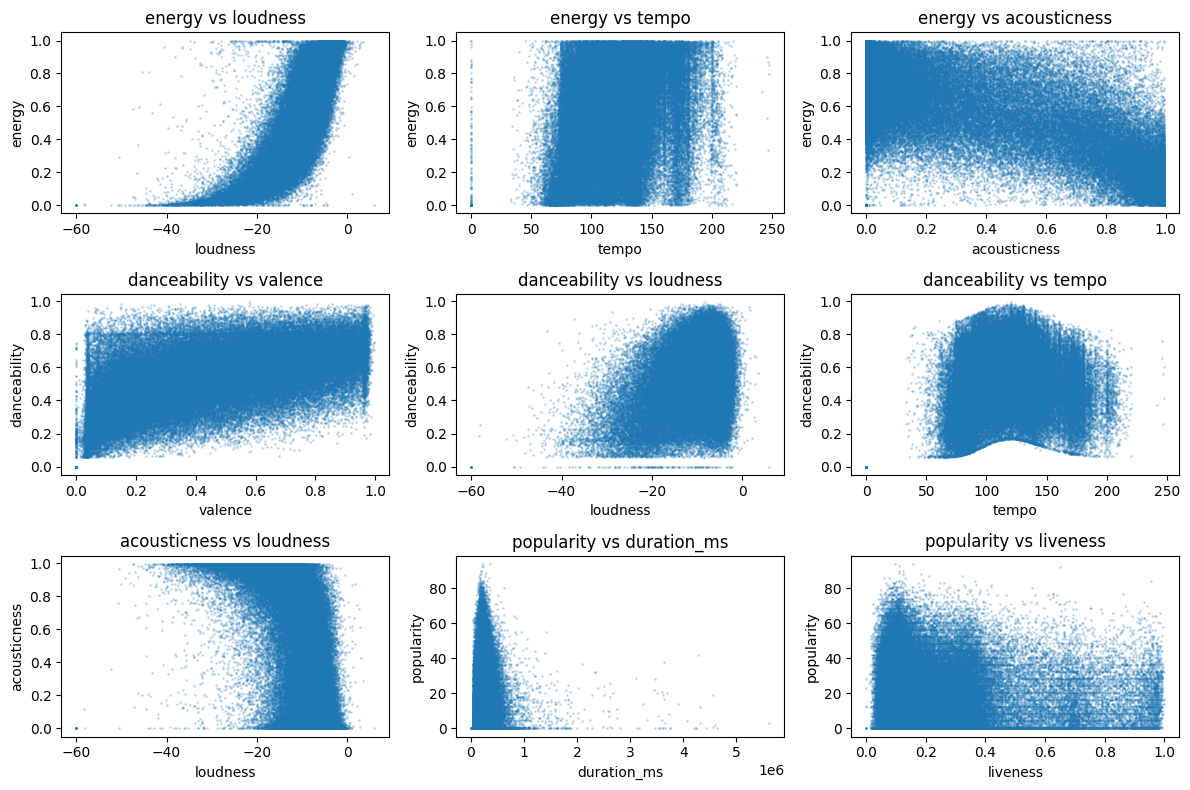

In [12]:
pairs = [
    ("loudness", "energy"),
    ("tempo", "energy"),
    ("acousticness", "energy"),

    ("valence", "danceability"),
    ("loudness", "danceability"),
    ("tempo", "danceability"),

    ("loudness", "acousticness"),
    ("duration_ms", "popularity"),
    ("liveness", "popularity"),
]

plt.figure(figsize=(12, 8))

for i, (x_col, y_col) in enumerate(pairs, start=1):
    if x_col not in df.columns or y_col not in df.columns:
        continue
    plt.subplot(3, 3, i)
    sample = df[[x_col, y_col]].dropna()
    # random sample to keep plot manageable
    if len(sample) > 100_000:
        sample = sample.sample(100_000, random_state=42)
    plt.scatter(sample[x_col], sample[y_col], s=1, alpha=0.2)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.tight_layout()

plt.show()


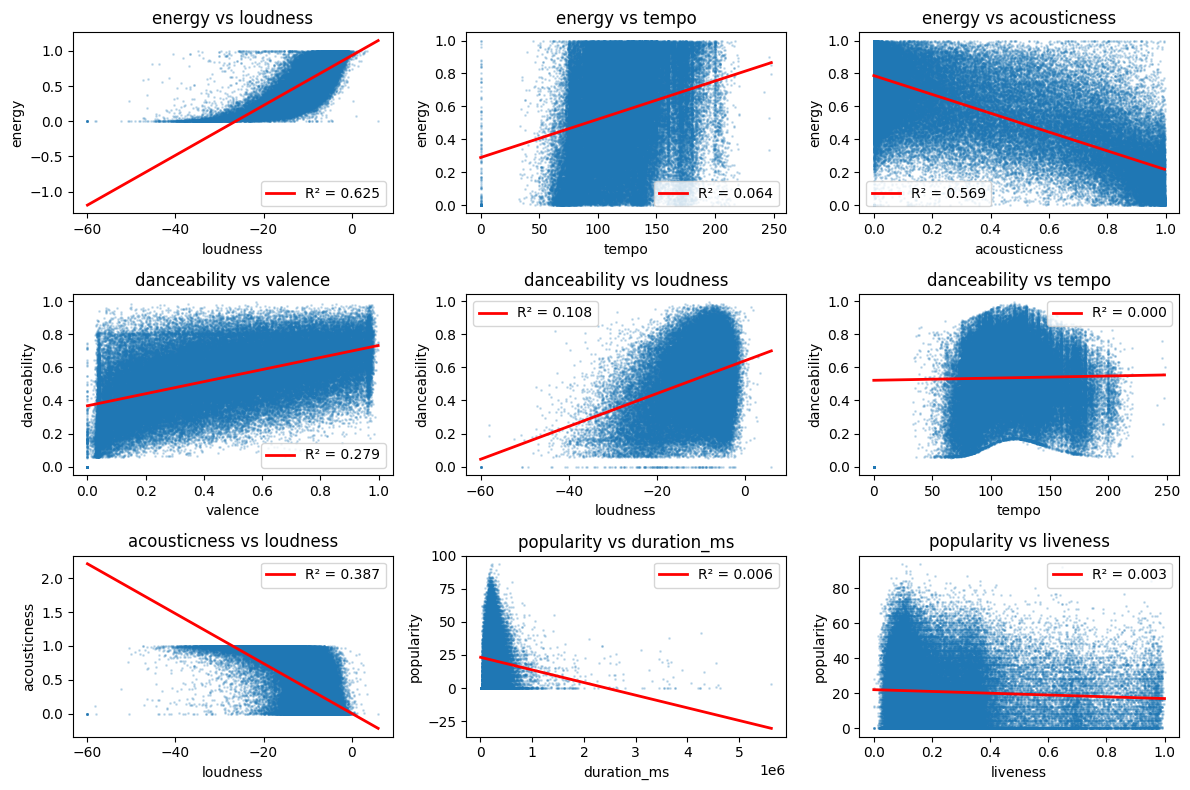

In [13]:
import numpy as np
from scipy import stats

pairs = [
    ("loudness", "energy"),
    ("tempo", "energy"),
    ("acousticness", "energy"),
    ("valence", "danceability"),
    ("loudness", "danceability"),
    ("tempo", "danceability"),
    ("loudness", "acousticness"),
    ("duration_ms", "popularity"),
    ("liveness", "popularity"),
]

plt.figure(figsize=(12, 8))

for i, (x_col, y_col) in enumerate(pairs, start=1):
    if x_col not in df.columns or y_col not in df.columns:
        continue
    plt.subplot(3, 3, i)
    sample = df[[x_col, y_col]].dropna()
    if len(sample) > 100_000:
        sample = sample.sample(100_000, random_state=42)
    
    x = sample[x_col]
    y = sample[y_col]
    
    plt.scatter(x, y, s=1, alpha=0.2)
    
    # Linear regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_x = np.linspace(x.min(), x.max(), 100)
    line_y = slope * line_x + intercept
    plt.plot(line_x, line_y, 'r-', linewidth=2, label=f'R² = {r_value**2:.3f}')
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.legend()
    plt.tight_layout()

plt.show()

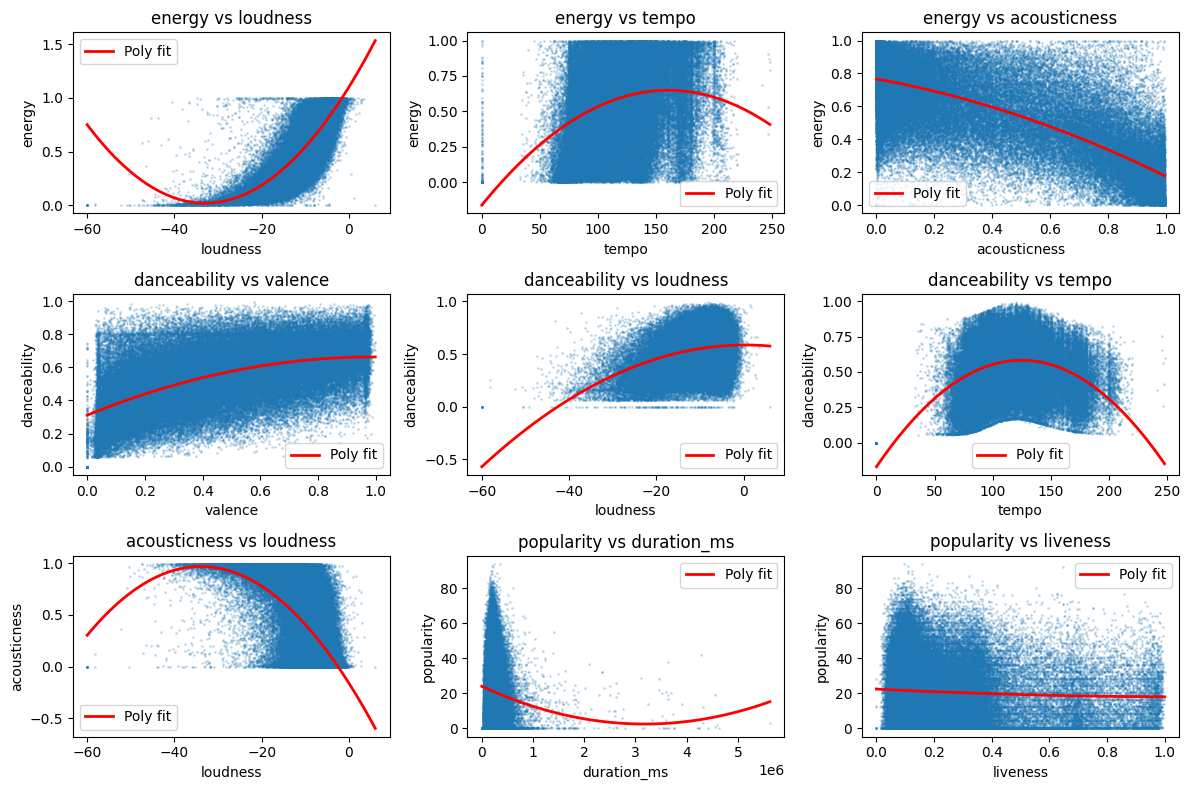

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

plt.figure(figsize=(12, 8))

for i, (x_col, y_col) in enumerate(pairs, start=1):
    if x_col not in df.columns or y_col not in df.columns:
        continue
    plt.subplot(3, 3, i)
    sample = df[[x_col, y_col]].dropna()
    if len(sample) > 100_000:
        sample = sample.sample(100_000, random_state=42)
    
    x = sample[x_col].values.reshape(-1, 1)
    y = sample[y_col].values
    
    plt.scatter(x, y, s=1, alpha=0.2)
    
    # Polynomial regression (degree 2)
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ])
    poly_model.fit(x, y)
    
    x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_line = poly_model.predict(x_line)
    plt.plot(x_line, y_line, 'r-', linewidth=2, label='Poly fit')
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.legend()
    plt.tight_layout()

plt.show()

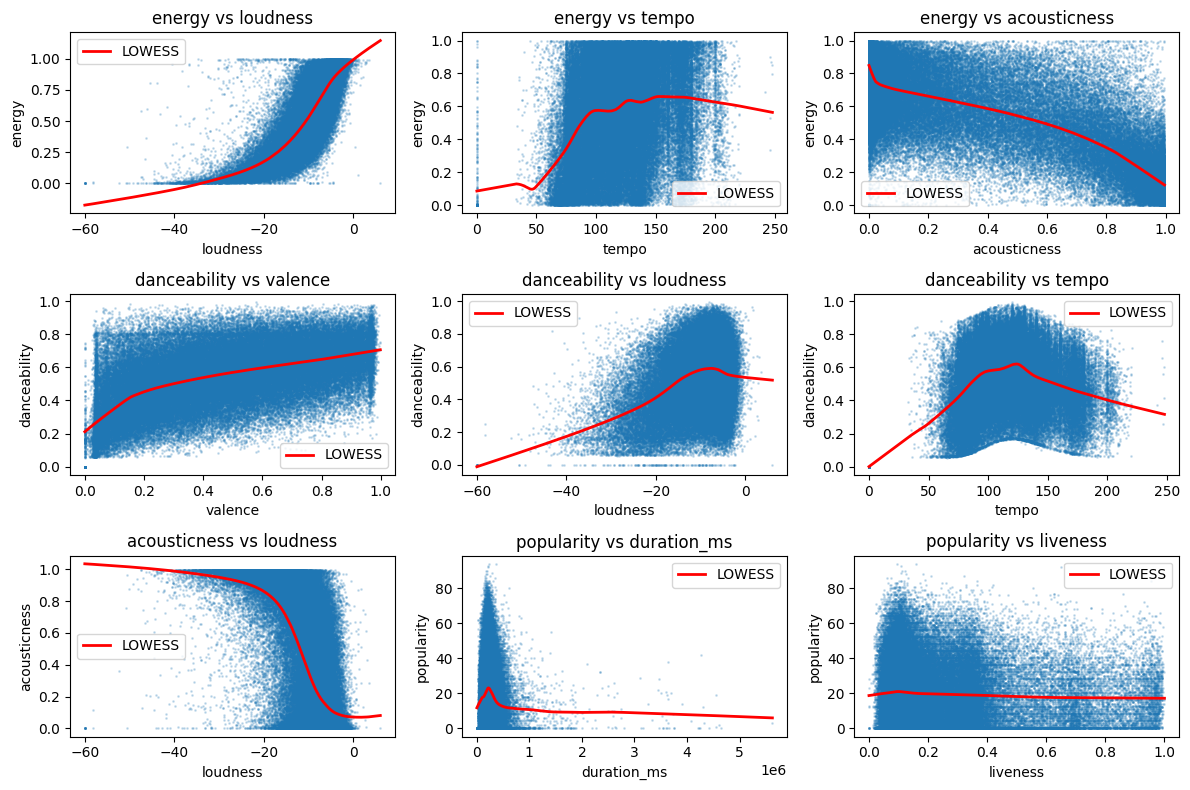

In [25]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(12, 8))

for i, (x_col, y_col) in enumerate(pairs, start=1):
    if x_col not in df.columns or y_col not in df.columns:
        continue
    plt.subplot(3, 3, i)
    sample = df[[x_col, y_col]].dropna()
    if len(sample) > 100_000:
        sample = sample.sample(100_000, random_state=42)
    
    x = sample[x_col]
    y = sample[y_col]
    
    plt.scatter(x, y, s=1, alpha=0.2)
    
    # LOWESS smoothing
    lowess_smooth = lowess(y, x, frac=0.3)  # frac controls smoothness
    plt.plot(lowess_smooth[:, 0], lowess_smooth[:, 1], 'r-', linewidth=2, label='LOWESS')
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.legend()
    plt.tight_layout()

plt.show()

In [14]:
feature_cols = [
    "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]

existing_feats = [c for c in feature_cols if c in df.columns]

# Hash feature rows to detect duplicates
feature_hash = df[existing_feats].astype(str).agg("|".join, axis=1)
df["feature_hash"] = feature_hash

dup_counts = df["feature_hash"].value_counts()
n_unique_hashes = len(dup_counts)
n_duplicates = (dup_counts > 1).sum()

print(f"Total rows:           {len(df):,}")
print(f"Unique feature rows:  {n_unique_hashes:,}")
print(f"Feature vectors with duplicates: {n_duplicates:,}")

# Optional: inspect a few feature hashes that correspond to > 5 tracks
multi_hashes = dup_counts[dup_counts > 5].head(5).index.tolist()
print("\nExamples of feature hashes shared by >5 tracks:")
display(df[df["feature_hash"].isin(multi_hashes)].head(20))

# Clean up helper column if you don't want to keep it
# df.drop(columns=["feature_hash"], inplace=True)


Total rows:           4,589,288
Unique feature rows:  4,459,636
Feature vectors with duplicates: 105,170

Examples of feature hashes shared by >5 tracks:


,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,explicit,time_signature,popularity,feature_hash
8143,00lPppvNMTDI6YyS0fMJRO,0.582,0.606,6,-9.961,1,0.0289,0.124,0.001390,0.151,0.504,111.441,234493.0,2018.0,False,5.0,NaN,0.5820000000000001|0.606|6|-9.961|1|0.0289|0.1...
17821,01ger8hoR0K6zAStAad5Nt,0.686,0.538,2,-8.026,1,0.0345,0.181,0.000003,0.113,0.584,115.884,190779.0,NaN,0,4.0,13.0,0.686|0.538|2|-8.026|1|0.0345|0.181|3.13e-06|0...
35130,03ODGrfFNJ3A4oCzX4AFfK,0.000,0.000,0,-60.000,0,0.0000,0.000,0.000000,0.000,0.000,0.000,223112.0,NaN,NaN,0.0,NaN,0.0|0.0|0|-60.0|0|0.0|0.0|0.0|0.0|0.0|0.0
37164,03akdTei5utfVNnPl1v7EI,0.000,0.000,0,-60.000,0,0.0000,0.000,0.000000,0.000,0.000,0.000,262386.0,2009.0,False,0.0,NaN,0.0|0.0|0|-60.0|0|0.0|0.0|0.0|0.0|0.0|0.0
37656,03dzKrMePNq35X4zkNLA84,0.582,0.606,6,-9.961,1,0.0289,0.124,0.001390,0.151,0.504,111.441,234493.0,2017.0,False,5.0,NaN,0.5820000000000001|0.606|6|-9.961|1|0.0289|0.1...
40786,03xYrKFtq1rdOE5957mHkS,0.000,0.000,0,-60.000,0,0.0000,0.000,0.000000,0.000,0.000,0.000,227000.0,2014.0,NaN,0.0,NaN,0.0|0.0|0|-60.0|0|0.0|0.0|0.0|0.0|0.0|0.0
45446,04ProUvjAVAZFxmTPnjYQI,0.000,0.000,0,-60.000,0,0.0000,0.000,0.000000,0.000,0.000,0.000,258434.0,NaN,NaN,0.0,NaN,0.0|0.0|0|-60.0|0|0.0|0.0|0.0|0.0|0.0|0.0
57163,05ZoVqA295W8ILrE2gNTWD,0.000,0.000,0,-60.000,0,0.0000,0.000,0.000000,0.000,0.000,0.000,4027.0,2007.0,False,0.0,NaN,0.0|0.0|0|-60.0|0|0.0|0.0|0.0|0.0|0.0|0.0
77364,07aUR8QqhFOObXHRYLZ74n,0.000,0.000,0,-60.000,0,0.0000,0.000,0.000000,0.000,0.000,0.000,276000.0,NaN,NaN,0.0,NaN,0.0|0.0|0|-60.0|0|0.0|0.0|0.0|0.0|0.0|0.0
93435,09CLGqjPP4dN9FDqNItIeg,0.000,0.000,0,-60.000,0,0.0000,0.000,0.000000,0.000,0.000,0.000,60133.0,NaN,NaN,0.0,NaN,0.0|0.0|0|-60.0|0|0.0|0.0|0.0|0.0|0.0|0.0


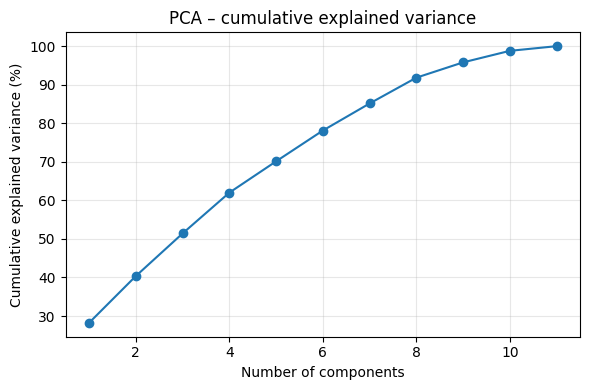

Top 2 components explain 40.35% of variance
Top 3 components explain 51.41% of variance
Top 5 components explain 70.12% of variance
Top 8 components explain 91.83% of variance
Top 11 components explain 100.00% of variance


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

feature_cols = [
    "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]
existing_feats = [c for c in feature_cols if c in df.columns]

X = df[existing_feats].dropna()

# sample for speed
if len(X) > 200_000:
    X = X.sample(200_000, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained = np.cumsum(pca.explained_variance_ratio_) * 100

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained) + 1), explained, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance (%)")
plt.title("PCA – cumulative explained variance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

for k in [2, 3, 5, 8, len(existing_feats)]:
    if k <= len(explained):
        print(f"Top {k} components explain {explained[k-1]:.2f}% of variance")


In [16]:
import pandas as pd
import numpy as np

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

rows = []

for col in numeric_cols:
    s = df[col]
    n = len(s)

    missing_count = s.isna().sum()
    zero_count = (s == 0).sum()

    rows.append({
        "feature": col,
        "dtype": s.dtype,
        "n_rows": n,
        "missing_count": missing_count,
        "missing_pct": round(missing_count / n * 100, 3),
        "zero_count": zero_count,
        "zero_pct": round(zero_count / n * 100, 3),
        "valid_nonzero_count": n - missing_count - zero_count,
    })

missing_zero_df = pd.DataFrame(rows).sort_values("missing_count", ascending=False)

print("=== Missing and Zero-Value Summary for Numeric Features ===")
display(missing_zero_df)


=== Missing and Zero-Value Summary for Numeric Features ===


,feature,dtype,n_rows,missing_count,missing_pct,zero_count,zero_pct,valid_nonzero_count
14,popularity,float64,4589288,2732560,59.542,231383,5.042,1625345
12,year,float64,4589288,2134563,46.512,10,0.000,2454715
13,time_signature,float64,4589288,21920,0.478,7113,0.155,4560255
11,duration_ms,float64,4589288,6016,0.131,0,0.000,4583272
0,danceability,float64,4589288,0,0.000,7023,0.153,4582265
1,energy,float64,4589288,0,0.000,692,0.015,4588596
2,key,int64,4589288,0,0.000,551515,12.017,4037773
6,acousticness,float64,4589288,0,0.000,2196,0.048,4587092
5,speechiness,float64,4589288,0,0.000,7021,0.153,4582267
4,mode,int64,4589288,0,0.000,1600400,34.873,2988888
